# Cluster based on holiday hourly data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np


The K_means function will cluster house by their holiday hour data and return the clustered labels.

Record the total gas consuming of each label in certain holiday to make label meaningful. 

In [4]:
def K_means(Mon,date,file):
    #generate dataset for clustering
    f = pd.read_csv(file)
    ID_list = f['dataid'].unique()
    DATA = []
    DATA_ID = []
    consu_tot = []
    for ID in ID_list:
        [h_data,tot] = hour_info(Mon,date,file,ID)
        if h_data != None:
            DATA.append(h_data)
            DATA_ID.append(ID)
            consu_tot.append(tot)
            
    X = np.array(DATA)
    kmeans = KMeans(n_clusters = 4, random_state=0).fit(X)
    LABEL = kmeans.labels_
   
            
    return [LABEL,consu_tot]
    

The function hour_info is used to generate hourly data for certain house in certain holiday.

To find the increase slope feature and avoid the interference of the total amount, every （hourly data）/ （the biggest data within the day ）to normalize.

If data missing or decrease,use the previous hold value. 

In [5]:
def hour_info(Mon,date,file,ID):#mon[10,11,12,1,2,3]  
    file = pd.read_csv(file)
    data = {}
    d = []
    for i in range(0,24):
        data[i]= []
    
    #filter file by dataid 
    file = file[(file['dataid']==ID) | (file['dataid']==str(ID))]
    if len(file) == 0:
        return None
    #filter file by month and date
    file = file.values
    for i in range(0,len(file)):
        if int(file[i][0].split('-')[1]) == Mon and int(file[i][0].split('-')[2].split(' ')[0]) == date:
            h_num=  int(file[i][0].split('-')[2].split(' ')[1].split(':')[0])
            data[h_num].append(file[i][2])
    hold = 0
    for i in range(0,24):
        if len(data[i]) != 0:
            hold = sum(data[i])/ len(data[i])
            break
    if hold == 0:
        return [None,None]
    #If data missing or decrease,append the previous hold value
    for i in range(0,24):
        if len(data[i]) != 0 and sum(data[i])/ len(data[i]) >= hold:
            data[i] = sum(data[i])/ len(data[i])
            hold = data[i]
            d.append(hold)
        else: 
            data[i] = hold
            d.append(hold)
            
    #compute the total gas consuming
    t = d[23] - d[0]
    
    #normalize
    for i in range(0,24):
        d[i] = d[i]/d[23]
        
    
    return [d,t]

Based on information of the neighbour from the Mueller Neighborhood Guide:

“The population of Mueller is 5,339 with 49% males and 51% females, and a median age of 36.

23% of this neighbourhood is occupied by families with children,

29% single-female families, 23% single-male families, and 

48% couples. 

The average household size in Mueller is 2.14, and the average family size is 2.81.

Obviously, according to common sense, the amount of gas has a great relationship with the population. Therefore, we decided to divide the data into four categories which is associated with family size and gas consumption to observe whether it can be consistent with the basic distribution information.

During Oct to Mar, U.S. statutory holidays are:

New Year's Day	            1 Jan 

Martin Luther King Jr. Day	   18 Jan

Veterans Day	           11 Nov

Thanksgiving Day	           25 Nov 

Christmas Day	           24 Dec

New Year's Day	           31 Dec

These six dates will be used for classification.

In [6]:
label = [[],[],[],[],[],[]]
con = [[],[],[],[],[],[]]
[label[0],con[0]]  = K_means(1,1,'dataport-export_gas_oct2015-mar2016.csv')
[label[1],con[1]]  = K_means(1,18,'dataport-export_gas_oct2015-mar2016.csv')
[label[2],con[2]]  = K_means(11,11,'dataport-export_gas_oct2015-mar2016.csv')
[label[3],con[3]]  = K_means(11,25,'dataport-export_gas_oct2015-mar2016.csv')
[label[4],con[4]]  = K_means(12,24,'dataport-export_gas_oct2015-mar2016.csv')
[label[5],con[5]]  = K_means(12,31,'dataport-export_gas_oct2015-mar2016.csv')

The code below is used to compute the average total gas consuming of each label in certain holiday and percentage of each label.

For New Years Day:
For label0: the percentage is 18.253968253968253%, with average total gas consuming is 64.87867494823877
For label1: the percentage is 42.857142857142854%, with average total gas consuming is 354.2113930308381
For label2: the percentage is 34.12698412698413%, with average total gas consuming is 284.02606127722504
For label3: the percentage is 4.761904761904762%, with average total gas consuming is 514.5555555555547
For Martin Luther King Jr. Day:
For label0: the percentage is 11.200000000000001%, with average total gas consuming is 41.70000000000333
For label1: the percentage is 31.2%, with average total gas consuming is 285.6878114088639
For label2: the percentage is 48.8%, with average total gas consuming is 231.17085610200252
For label3: the percentage is 8.799999999999999%, with average total gas consuming is 366.5772727272733
For Veterans Day:
For label0: the percentage is 41.12903225806452%, with average total gas consuming is 14.507563025210688
For label1: the

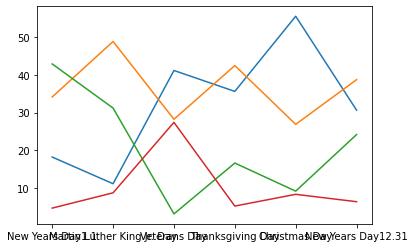

In [7]:
ave_con = [[],[],[],[],[],[]]
num_label = [[],[],[],[],[],[]]

Y = [[],[],[],[]]
T = [[],[],[],[]]

for i in range(0,6):
    s = []
    if i == 0:
        print('For New Years Day:')
    if i == 1:
        print('For Martin Luther King Jr. Day:')
    if i == 2:
        print('For Veterans Day:')
    if i == 3:
        print('For Thanksgiving Day:')
    if i == 4:
        print('For Christmas Day:')
    if i == 5:
        print('For New Years Day:')
    ave_con[i] = [0,0,0,0]
    num_label[i]= [0,0,0,0]
    for j in range(0,len(label[i])):
        l = label[i][j] 
        c = con[i][j]
        ave_con[i][l] = ave_con[i][l] + c
        num_label[i][l] = num_label[i][l] + 1
    

    for a in range(0,4):
        ave_con[i][a] = ave_con[i][a]/num_label[i][a]
        num_label[i][a] = num_label[i][a]/len((label[i]))*100
        print('For label'+str(a)+': the percentage is '+str(num_label[i][a])+'%, with average total gas consuming is '+str(ave_con[i][a]))
        s.append((ave_con[i][a],num_label[i][a]))

    #sort labels by average total gas consuming
    s=sorted(s,key=lambda t:t[0])  
    for a in range(0,4):
        Y[a].append(s[a][1])
        T[a].append(s[a][0])
X = ['New Years Day1.1','Martin Luther King Jr. Day','Veterans Day','Thanksgiving Day','Christmas Day','New Years Day12.31']    
print("As sorted correspondingly:")
for i in range(0,4):
    plt.plot(X,Y[i])
    
plt.show()

Looking at the average total gas consuming, in Veterans Day and Christmas Day ,the consumimg seems similar, they may not give proper feature clustering by amount of gas. Therefore, those holidays labels will not be involved in average calculating.

In [8]:
for i in range(0,4):#2,4
    Y[i][2] = 0
    Y[i][4] = 0
    print('Average percentage for No'+str(i)+'.label is: '+str(sum(Y[i])/4)+'%')
    print('Average total gas consuming is for No'+str(i)+'.label is: '+str(sum(T[i])/4))

Average percentage for No0.label is: 23.92629753758786%
Average total gas consuming is for No0.label is: 71.60710323734101
Average percentage for No1.label is: 41.01522599264535%
Average total gas consuming is for No1.label is: 236.11183687244772
Average percentage for No2.label is: 28.72933947772657%
Average total gas consuming is for No2.label is: 298.26703235090736
Average percentage for No3.label is: 6.329136992040217%
Average total gas consuming is for No3.label is: 386.3362655948416


In holidays, people who go to work or school are more likely to go home to eat, and the amount of total gas consuming can better reflect the population.

From the graph and data, based on information given above, we can make assumption that 

No.0 label represent family with 1 persons,which means single liver without children, 24%

No.1 label represent family with 2-3 persons,which means couples with or without children + single parent with child,41%

No.2 label represent family with 4-5 persons,which means couples with children (median size family),28%

No.3 label represent family with 5+ persons,which means big family,6%


By this assumption, the family with children is above 34%.

The average family size is 2.825 in this area.
